In [32]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [33]:
biomes = ['Not defined', 'Forest', 'Hill', 'Mountains', 'Ocean']

def get_chunk_coord(x, y):
    return np.array([x // 8, y // 8])

def get_world_coord(chunk_coord, coord_in_chunk):
    return 8 * chunk_coord + coord_in_chunk

def get_chunk_biome_center(seed, chunk_coord, prob_biome_center):
    np.random.seed(hash((seed, tuple(chunk_coord))) & 0xFFFFFFFF)
    if np.random.uniform() < prob_biome_center:
        return get_world_coord(chunk_coord, [np.random.randint(0, 8), np.random.randint(0, 8)]), np.random.randint(0, len(biomes))+1
    else:
        return None, 0
 
def get_chunk_shell(level):
    num_side = 2 * level + 1
    chunk_shell = []
    for i in range(num_side):
        x = i - num_side//2
        if abs(x) == num_side//2:
            for j in range(num_side):
                y = j - num_side//2
                chunk_shell.append(np.array([x, y]))
        else:
            chunk_shell.append(np.array([x,  num_side//2]))
            chunk_shell.append(np.array([x, -(num_side//2)]))
    return chunk_shell
    
def find_closest_biome(seed, x, y, prob_biome_center):
    
    current_coord = np.array([x, y])
    current_level = 0
    center_chunk_coord = get_chunk_coord(x, y)
    
    closest_biome = 0
    shortest_distance = float('inf')
    
    while True:
        shell = get_chunk_shell(current_level)
        
        found_better = False
        
        for chunk in shell:
            center, type = get_chunk_biome_center(seed, center_chunk_coord + chunk, prob_biome_center)
            
            if center is None:
                continue
                        
            new_distance = np.sum(np.abs(current_coord - center))
                
            if new_distance < shortest_distance:
                found_better = True
                shortest_distance = new_distance
                closest_biome = type

        if (closest_biome != 0) and (not found_better):
            return closest_biome
        
        
        
        current_level = current_level + 1
    

In [34]:
tree_prob_in_biome = [0.3, 0.1, 0.01, 0]
assert(len(tree_prob_in_biome) == (len(biomes) - 1))

def should_tree_be_at(x, y, seed, biome):
    np.random.seed(hash((seed, (x, y))) & 0xFFFFFFFF)
    if np.random.uniform() < tree_prob_in_biome[int(biome)-2]:
        return True
    else:
        return False

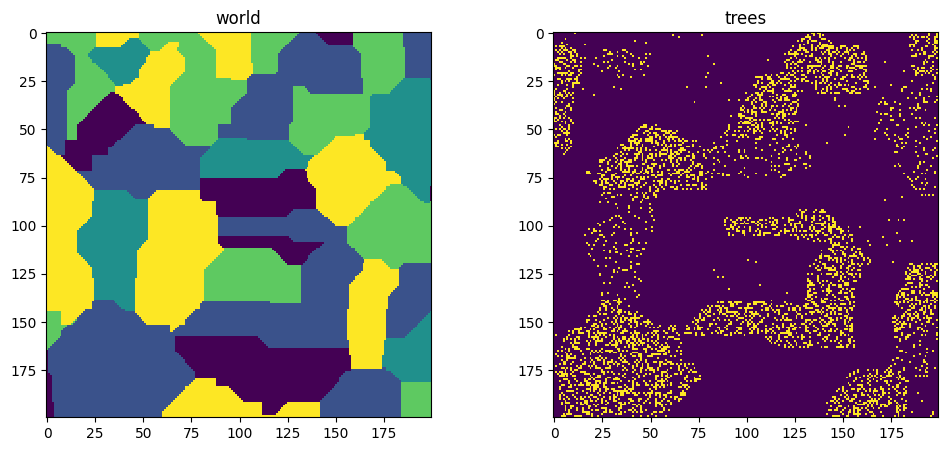

In [35]:
width = 200
seed = 42
prob_biome_center = 0.05
world_map = np.zeros((width, width))
possible_trees = np.zeros((width, width))

for i in range(width):
    for j in range(width):
        world_map[i][j] = find_closest_biome(seed, i, j, prob_biome_center)
        possible_trees[i][j] = int(should_tree_be_at(i, j, seed, world_map[i][j]))
        
fig, ax = plt.subplots(1, 2, figsize=(12, 5))        

ax[0].imshow(world_map, interpolation="nearest")
ax[0].set_title("world")

ax[1].imshow(possible_trees, interpolation="nearest")
ax[1].set_title("trees")

plt.show()